In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
sns.set_style("darkgrid")

In [2]:
state = pd.read_csv('data/state.csv')

In [3]:
state.head(10)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [4]:
state.tail(10)

,State,Population,Murder.Rate,Abbreviation
40,South Dakota,814180,2.3,SD
41,Tennessee,6346105,5.7,TN
42,Texas,25145561,4.4,TX
43,Utah,2763885,2.3,UT
44,Vermont,625741,1.6,VT
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [5]:
mean = state.Population.mean()
mean

6162876.3

In [6]:
trim_mean = scipy.stats.trim_mean(state.Population, 0.1)
trim_mean

4783697.125

In [7]:
median = state.Population.median()
median

4436369.5

In [8]:
weighted_mean = np.average(state['Murder.Rate'], weights=state.Population)
weighted_mean

4.445833981123393

In [9]:
state.sort_values(['Murder.Rate'], inplace=True)
cumsum = state.Population.cumsum()
cutoff = state.Population.sum()/2.0
weighted_median = state['Murder.Rate'][cumsum >= cutoff].iloc[0]
weighted_median

4.4

In [10]:
std = state.Population.std()
std

6848235.347401144

In [11]:
Q1 = state.Population.quantile(0.25)
Q3 = state.Population.quantile(0.75)
IQR = Q3 - Q1
IQR

4847308.0

In [12]:
# In R the mad is scaled by a constant rdocumentation.org/packages/stats/versions/3.6.2/topics/mad
constant = 1.4826
diff = (state.Population - median).abs()
mad = constant * diff.median()
mad

3849870.3852

In [13]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [14]:
state['Population per million'] = state.Population / 1000000

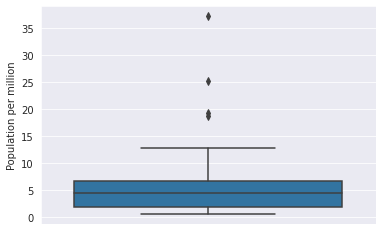

In [15]:
sns.boxplot(state['Population per million'], orient = 'v')

In [16]:
bins = np.linspace(state.Population.min(), state.Population.max(), 11)
bins

array([  563626.,  4232659.,  7901692., 11570725., 15239758., 18908791.,
       22577824., 26246857., 29915890., 33584923., 37253956.])

In [17]:
freq_table = pd.cut(state.Population, bins, include_lowest=True).value_counts()
freq_table

(563625.999, 4232659.0]     24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [18]:
state.Population.value_counts(bins=11, sort=False)

(526935.669, 3899110.545]       24
(3899110.545, 7234595.091]      14
(7234595.091, 10570079.636]      5
(10570079.636, 13905564.182]     3
(13905564.182, 17241048.727]     0
(17241048.727, 20576533.273]     2
(20576533.273, 23912017.818]     0
(23912017.818, 27247502.364]     1
(27247502.364, 30582986.909]     0
(30582986.909, 33918471.455]     0
(33918471.455, 37253956.0]       1
Name: Population, dtype: int64

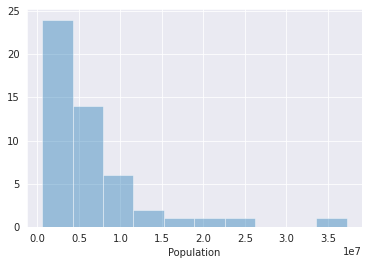

In [19]:
sns.distplot(state.Population, bins=bins, kde=False)

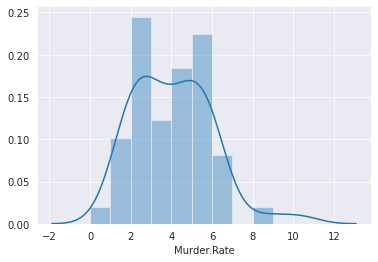

In [20]:
sns.distplot(state['Murder.Rate'], bins=np.arange(11))

In [21]:
dfw = pd.read_csv('data/dfw_airline.csv')

In [22]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


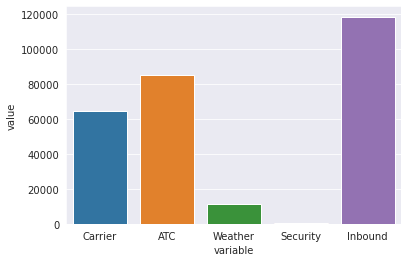

In [23]:
dfw_long = pd.melt(dfw)
sns.barplot(x=dfw_long.variable, y=dfw_long.value)

In [24]:
sp500_sec = pd.read_csv('data/sp500_sectors.csv')
sp500_px = pd.read_csv('data/sp500_data.csv')

In [25]:
syms = sp500_sec[sp500_sec.sector == 'etf']['symbol']
data = sp500_px[sp500_px['Unnamed: 0'] > '2012-07-01']

In [26]:
p_corr = data[syms].corr()

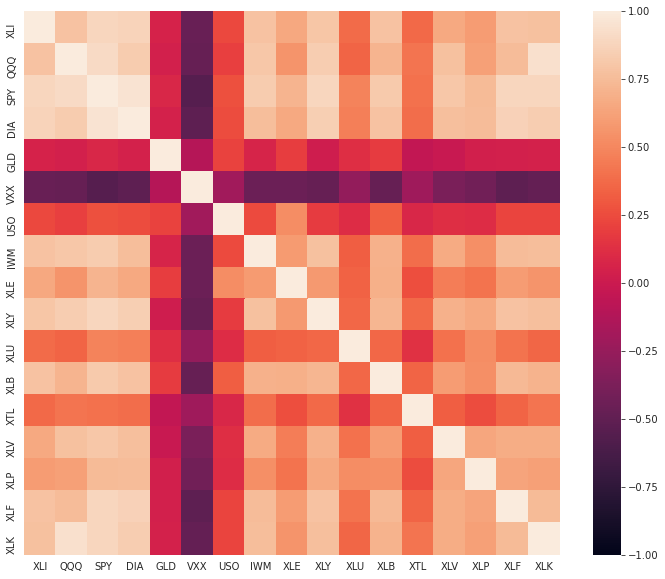

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(p_corr, vmin=-1.0,vmax=1.0)

In [28]:
tele_sym = sp500_sec[sp500_sec['sector']=='telecommunications_services']['symbol']
telecomm = sp500_px[tele_sym]

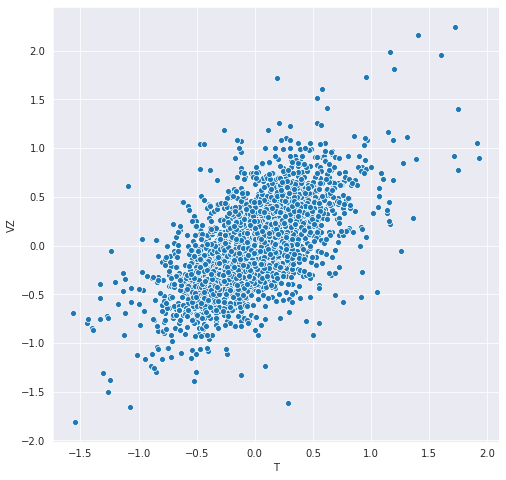

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=telecomm['T'], y=telecomm['VZ'])

In [30]:
kc_tax = pd.read_csv('data/kc_tax.csv')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [31]:
kc_tax0 = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100) & (kc_tax['SqFtTotLiving'] < 3500)]
kc_tax0.shape[0]

432693

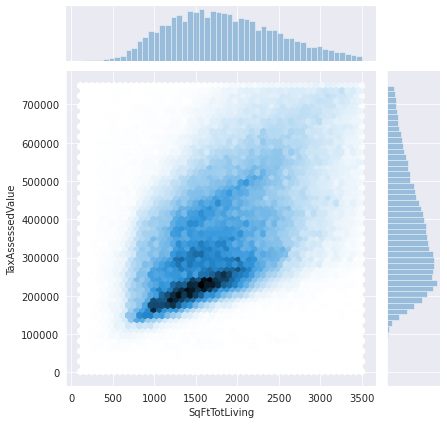

In [32]:
sns.jointplot(x=kc_tax0['SqFtTotLiving'], y=kc_tax0['TaxAssessedValue'], kind='hex')

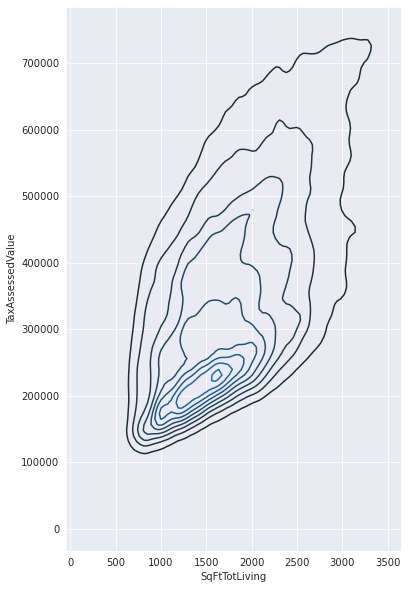

In [33]:
plt.figure(figsize=(6,10))
sns.kdeplot(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'])

In [34]:
lc_loan = pd.read_csv('data/lc_loans.csv')
lc_loan.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [35]:
# lc_loan['status'] = lc_loan['status'].astype('category')
# lc_loan['grade'] = lc_loan['grade'].astype('category')

In [36]:
# count
pd.crosstab(lc_loan['grade'], lc_loan['status'])

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


In [37]:
# row normalize
pd.crosstab(lc_loan['grade'], lc_loan['status'], normalize='index')

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.021548,0.690454,0.281528,0.006470
B,0.040054,0.709013,0.235401,0.015532
C,0.049828,0.735702,0.191495,0.022974
D,0.067410,0.717328,0.184189,0.031073
E,0.081657,0.707936,0.170929,0.039478
F,0.118258,0.654371,0.180409,0.046962
G,0.126196,0.614008,0.198396,0.061401


In [38]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats['airline'] = airline_stats['airline'].astype('category')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


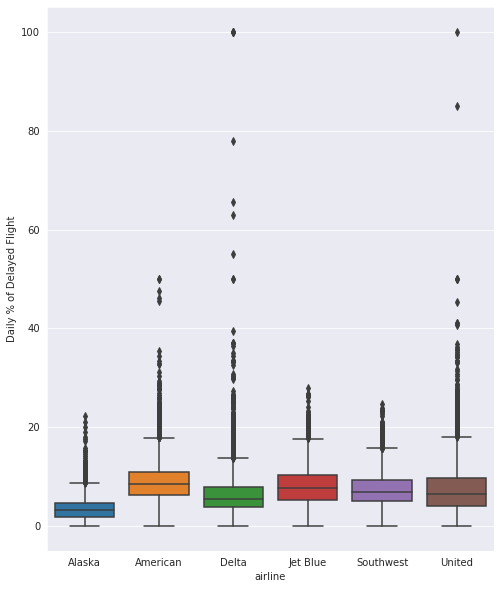

In [39]:
plt.figure(figsize=(8,10))
ax = sns.boxplot(x='airline', y='pct_carrier_delay', data=airline_stats)
ax.set(ylabel='Daily % of Delayed Flight')
plt.show()

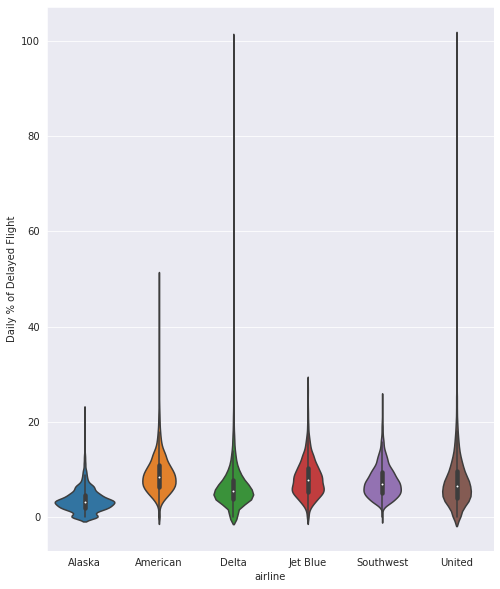

In [40]:
plt.figure(figsize=(8,10))
ax = sns.violinplot(x='airline', y='pct_carrier_delay', data=airline_stats)
ax.set(ylabel='Daily % of Delayed Flight')
plt.show()

In [41]:
subset = kc_tax0[kc_tax0['ZipCode'].isin([98188, 98105, 98108, 98126])]

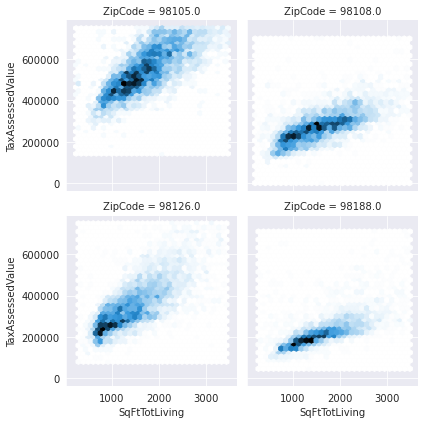

In [42]:
def hexbin(x, y, color, **kwargs):
    color_rgb = mpl.colors.colorConverter.to_rgb(color)
    colors = [sns.set_hls_values(color_rgb, l=l)  # noqa
              for l in np.linspace(1, 0, 12)]
    cmap = sns.blend_palette(colors, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)
    
g = sns.FacetGrid(subset, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue')